# Fundamentos de estadística

Como buen cientista de datos, vamos a repasar la teoría estadística que necesitamos como base de apoyo en nuestros análisis y construcción de modelos.



<img src="Estadisticas_bases.PNG">

In [1]:
# Utilizamos las librerías para ello

import pandas as pd
import numpy as np


## 1. Medidas de centralización

Nos sirve para ver cómo se sitúan los datos. Son la media, mediana, percentiles y moda.


In [2]:
# Generamos una lista de números aleatorios y revisaremos sus medidas de centralización

import random # Módulo para generar números aleatorios
n = 10000 # Muestras
m = 1000000 # Límite superior del conjunto
rango = range(m) # Rango de números para hacer la selección, en este caso del 0 a m
A = random.sample(rango, n) # 'A' es el conjunto de datos numéricos aleatorios, de tamaño n



In [3]:
# Promedio (media)
np.mean(A)

496113.7417

In [4]:
# Mediana
np.median(A)

494419.0

In [5]:
# Para la moda, utilizaremos otra librería

from scipy import stats

stats.mode(A)

ModeResult(mode=array([222]), count=array([1]))

In [6]:
# Percentil 25
np.percentile(A, 25)


239168.75

## 2. Medidas de dispersión

La varianza y desviación típica, nos indica si los valores se desplazan mucho o poco con respecto de la media.

La *varianza* es como se aleja cada valor de la media
 * La varianza eleva los valores al cuadradonos introduce en una nueva dimensión.
 * Puede no tener sentido.
 
La *desviación típica* es la raíz cuadrada de la varianza. 
 * Con la desviación típica volvemos a la dimensión original.

*Coeficiente de variación*: nos mide la variabilidad relativa entre la desviación típica entre la media.

In [7]:
# Varianza

np.var(A)

84260856060.67038

In [8]:
# Desviación típica (estándar)

np.std(A)

290277.2055478528

In [9]:
# coeficiente de variacion std/mean*100
# variabilidad relativa entre la media y la std, si hay mucha variabilidad será grande el coeficiente.

np.std(A)/np.mean(A)*100


58.51021270912173

## 3. Medidas de asimetría

Momento de orden r, respecto a la media. El momento de orden r. son los momentos de distribución respecto a la media.

3.1 Asimetría de Fisher
* Si el coeficiente es = 0; Significa que vuestra función es perfectamente simetríca, se distribuye igual, por ejemplo la distribución normal. Raro es que salga cero

* Si el coeficiente es >0; Significa que cuánto más positivo es este valor más desplazada está la distribución hacía la izquierda, de modo que tenemos una asimetría positiva, nos queda la media muy por encima de la distribución.

* Si el el coeficiente es <0; Significa que cuánto más negativo es este valor más desplazado está la distribución hacía la derecha, de modo que tenemos una asimetría negativa, nos queda la media muy por debajo de la distribución.


In [10]:
import scipy.stats as sp # Para modelos de asimetría

asimetria = sp.skew(A)
asimetria

0.01676462523284354

3.2 Curtosis

* igual 0 Mesocúrtica: Distribución perfecta, asemejada a la distribución normal en forma, no en valores. Está compensado tanto el centro como las colas.

* mayor a 0 Leptocúrtica: Distribución donde se le concentran mucho los datos en el valor central, y apenas tiene cola.

* menor a 0 Platicúrtica: Distribución donde hay pocos valores que se concentren respecto al valor central (media) y hay muchos que aparecen hacia las colas, se concentran más en los laterales. Existe valor central, pero también hay mucha presencia de colas directamente en la distribución de nuestros datos.


In [11]:
curtosis=sp.kurtosis(A)
curtosis


-1.2201063205820903

## 4. Muestreo aleatorio

<img src="muestreo.PNG">

# 5. Contrastes de hipótesis

<img src="Cnotraste_hipotesis.PNG">

$H_0$ es lo que defenderemos a morir! En caso de que no quede más remedio, nos quedaremos con $H_1$

TCL = Teorema central del Límite

<img src="Casos_hipotesis.PNG">

¿Y cómo aceptamos/rechazamos la hipótesis nula ($H_0$)?

<img src="Rechazo_hipotesis.PNG">

En este caso tenemos el gráfico de una distribución de una variable aleatoria $X$, con $Z_1$ y $Z_2$ dos estadísticos correspondientes a dos valores de la variable aleatoria en cuestión y llamemos $P_1$ y $P_2$ a las probabilidades encerradas por debajo de la curva justo a la izquierda. Entonces la probabilidad de que la variable aleatoria tome un valor menor a $Z_1$ es $P_1$, en notación matemática sería:

$$P(X < Z_1) = P_1 $$

Y de forma complementaria

$$P(X > Z_1) = 1- P_1 $$

Con esto podemos definir niveles de confianza, pero espera, ¿que son los niveles de confianza? Son los valores límites que estamos dispuestos a considerar para defender una hipótesis nula $H_0$ como verdadera, dicho de otra forma, *es la probabilidad con la que nosotros estamos seguros de que la variable aleatoria va a caer ahí dentro*

<img src="Intervalos_confianza.PNG">

Oook, pero y ¿qué es eso del nivel de significación? Es básicamente la representación de la probabilidad de que la hipótesis nula $H_0$ **no** sea cierta, y se representa con $\alpha$. Simplemente es el opuesto al nivel de confianza.

¿Y eso del $p_{valor}$? Es la probabilidad de que la función de distribución supere el valor del estadístico de contraste (que viene de un z-test o t-test), es la probabilidad máxima de caer fuera del estadístico de contraste.    

<img src="p_valor.PNG">



Y entonces, ¿cuando aceptamos la hipótesis nula $H_0$?



<img src="Conclusion_hipotesis.PNG">

Entonces, el resumen del contraste de hipótesis es:

1. Definir hipótesis nula ($\mu_0$) y alternativa uni o bilateral.
2. Tomar una muestra aletoria de tamaño $n$ y calcular el valor del estimador (promedio, proporción, etc..)
3. Calcular el estadístico de contraste $Z-valor$ o $t-valor$.
4. Calcular el $p_{valor}$ asociado
5. Comparar $p_{valor}$ y nivel de significacion y decidir.

¿Y un ejemplo práctico de esto? Vamos por ello!

Ejemplo: Just Eat

El pizzero de Just-Eat **afirma** que trae la comida en un **tiempo promedio** inferior a **20 minutos** con una **desviación típica de 3**.

Como sospechamos que es falso, tomamos 64 de las entregas de la última semana y obtenemos una media de 21.2 minutos.

¿Podemos aceptar su afirmación a un nivel de confianza del 95%?

Resolvamos:

**1. Identificar hipótesis nula y alternativa**

En este caso sería: 

$H_0$: tiempo promedio inferior a 20 minutos -> $\mu$ <= 20

La hipótesis alternativa sería el complemento:

$H_1$: tiempo promedio superior a 20 minutos -> $\mu$ > 20

Además el enunciado me entrega el valor de la desviación típica (estándar): $\sigma$ = 3

**2. Tomar una muestra aletoria de tamaño $n$ y calcular el valor del estimador**

En este caso queremos estimar el promedio, y para ello se utilizó una muestra de 64 entregas, obteniendo un valor promedio de 21.2 minutos, entonces:

$\bar{X} = 21.2$ y $n = 64$


**3. Calcular el estadístico de contraste $Z-valor$ o $t-valor$**

Como el valor de desviación estándar es conocido, utilizamos el estadístico de prueba $Z_{valor}$. Sabemos que:

$$ Z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$$

Reemplazamos:

$$ Z = \frac{21.2 - 20}{\frac{3}{\sqrt{64}}} = 3.2$$

**4. Calcular el $p_{valor}$ asociado**

Sabemos que: $$p = P(Z>3.2) = 1 - P(Z<3.2)$$

Aquí podemos utilizar alguna tabla de la distribución normal estandarizada, o bien generar nosotros el valor con la librería **scipy**


In [31]:
from scipy.stats import norm

norm.cdf(3.2)

0.9993128620620841

Entonces el valor p sería:

$$p = 1 - 0.999 = 0.001$$
$$p = 0.001 $$

**5. Comparar $p_{valor}$ y nivel de significacion y decidir.**

En este caso el nivel de confianza es del 95%, por lo tanto nuestreo nivel de significancia es el complemento $\alpha = 0.05$

Y como se cumple que: $$0.001 < 0.05 \Rightarrow p_{valor} < \alpha$$

Por lo tanto, podemos llamar al pizzero de Just-Eat y comentarle que tenemos evidencia suficiente para rechazar su afirmación (rechazar la hipotesis nula) y que en definitiva se demora más de 20 minutos en entregar sus pizzas.

¿Genial no?


## 6. Correlación

De forma teórica, presentamos la correlación de Pearson, luego lo haremos de forma práctica

<img src="Corr_Pearson.PNG">

In [35]:
# Hagámoslo de forma práctica, con un data set

data_ads = pd.read_csv('/Users/fsanmartin/python-ml-course-master/datasets/ads/Advertising.csv')
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [37]:
# Agregaremos una columna comenzando con un coeficiente de correlación entre 
# Los gastos por publicidad en TV con respecto a las ventas

data_ads['corrn'] = (data_ads['TV'] - np.mean(data_ads['TV'])) * (data_ads['Sales'] - np.mean(data_ads['Sales']))
data_ads['corrl'] = (data_ads['TV'] - np.mean(data_ads['TV']))**2

data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corrl
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [38]:
data_ads['corr2'] = (data_ads['Sales'] - np.mean(data_ads['Sales']))**2
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corrl,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [39]:
corr_pearson = sum(data_ads['corrn']) / np.sqrt(sum(data_ads['corrl'])*sum(data_ads['corr2']))
corr_pearson

0.782224424861606

Y cómo ya saben, si esto hay que hacerlo muchas veces, mejor tener una función que lo realice

In [40]:
def corr_coeff(df, var1, var2):
    
    df['corrn'] = (df[var1] - np.mean(df[var1])) * (df[var2] - np.mean(df[var2]))
    
    df['corrl'] = (df[var1] - np.mean(df[var1]))**2
    
    df['corr2'] = (df[var2] - np.mean(df[var2]))**2
    
    corr_p = sum(df['corrn']) / np.sqrt(sum(df['corrl'])*sum(df['corr2']))
    
    return corr_p

In [41]:
df = pd.read_csv('/Users/fsanmartin/python-ml-course-master/datasets/ads/Advertising.csv')

# Calculemos las correlaciones entre todas las variables

cols = df.columns.values

for x in cols:
    for y in cols:
        print(x + ", "+ y + " : " + str(corr_coeff(df, x, y)))

TV, TV : 1.0
TV, Radio : 0.05480866446583009
TV, Newspaper : 0.056647874965056993
TV, Sales : 0.782224424861606
Radio, TV : 0.05480866446583009
Radio, Radio : 1.0
Radio, Newspaper : 0.3541037507611752
Radio, Sales : 0.5762225745710553
Newspaper, TV : 0.056647874965056993
Newspaper, Radio : 0.3541037507611752
Newspaper, Newspaper : 1.0
Newspaper, Sales : 0.22829902637616525
Sales, TV : 0.782224424861606
Sales, Radio : 0.5762225745710553
Sales, Newspaper : 0.22829902637616525
Sales, Sales : 1.0


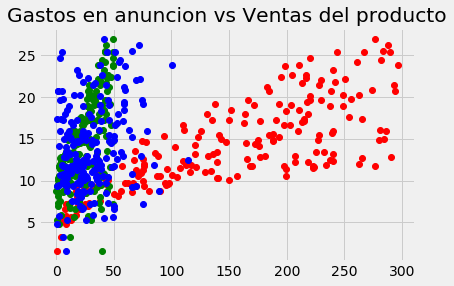

In [46]:
# Hagamos una gráfica de nube de puntos entre las ventas y los gastos en anuncios en los medios

import matplotlib.pyplot as plt

plt.plot(df['TV'], df['Sales'], 'ro')
plt.plot(df['Radio'], df['Sales'], 'go')
plt.plot(df['Newspaper'], df['Sales'], 'bo')
plt.title('Gastos en anuncios vs Ventas del producto');

In [48]:
## Pandas tiene un forma sencilla de realizar. volveremos a cargar el dataset

df = pd.read_csv('/Users/fsanmartin/python-ml-course-master/datasets/ads/Advertising.csv')
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


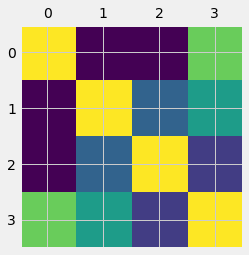

In [50]:
# Y una forma de representar esta matriz de correlación es:

plt.matshow(df.corr()) # El color verde indica mayor correlación